# Samplers

This tutorial gives some examples of the usage for the samplers, a classical simulation/approximation of genuine boson samplers. That is, from an
[`Input`](@ref) configuration and an [`Interferometer`](@ref) we provide tools to sample for the classically hard to simulate boson sampling distribution.

## Bosonic sampler

This model is an exact sampler based on the famous algorithm of [Clifford-Clifford](https://arxiv.org/abs/1706.01260). (Note that we did not yet implement the [faster version](https://arxiv.org/abs/2005.04214) for non vanishing boson density.)

We present here the general syntax through an example. We simulate `n=4` indistinguishable photons among
`m=16` modes. To do so, we first need to define our [`Bosonic`](@ref) input with
randomly placed photons

In [2]:
using BosonSampling

In [4]:
n = 4;

m = n^2;

my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)))

Input{Bosonic}(state = [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0], 4, 16, GramMatrix{Bosonic}(4, ComplexF64[1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im 1.0 + 0.0im], nothing, nothing, OrthonormalBasis(nothing)), nothing)

and we use a random interferometer

In [5]:
my_interf = RandHaar(m)

Interferometer :

Type : RandHaar
m : 16
U : 
ComplexF64[-0.17733374874943086 - 0.06546604974521524im 0.1863711780246895 - 0.12684446675979483im … 0.02362387942928499 + 0.0664363484033146im -0.009335599759300026 + 0.12680069857712659im; 0.32883953189892995 + 0.29827850523396926im -0.11557475909583803 - 0.16638306155447258im … -0.03651012699678535 + 0.029228396201619194im 0.010342765396431072 - 0.16767436863076546im; … ; -0.0950284259311078 - 0.1402952161348636im 0.27054661898540855 + 0.2690717153641462im … -0.20268041299934025 + 0.05813038873650106im -0.04397070642889425 + 0.11719600634135609im; 0.0735745856676235 + 0.01987900965697041im -0.054195437018389456 - 0.03398752040429985im … 0.10640329417369591 - 0.20570827185103088im -0.0615976718930038 + 0.020789240743053883im]

and then call [`cliffords_sampler`](@ref) to run the simulation

In [6]:
res = cliffords_sampler(input=my_input, interf=my_interf)

4-element Vector{Int64}:
  2
  3
 11
 15

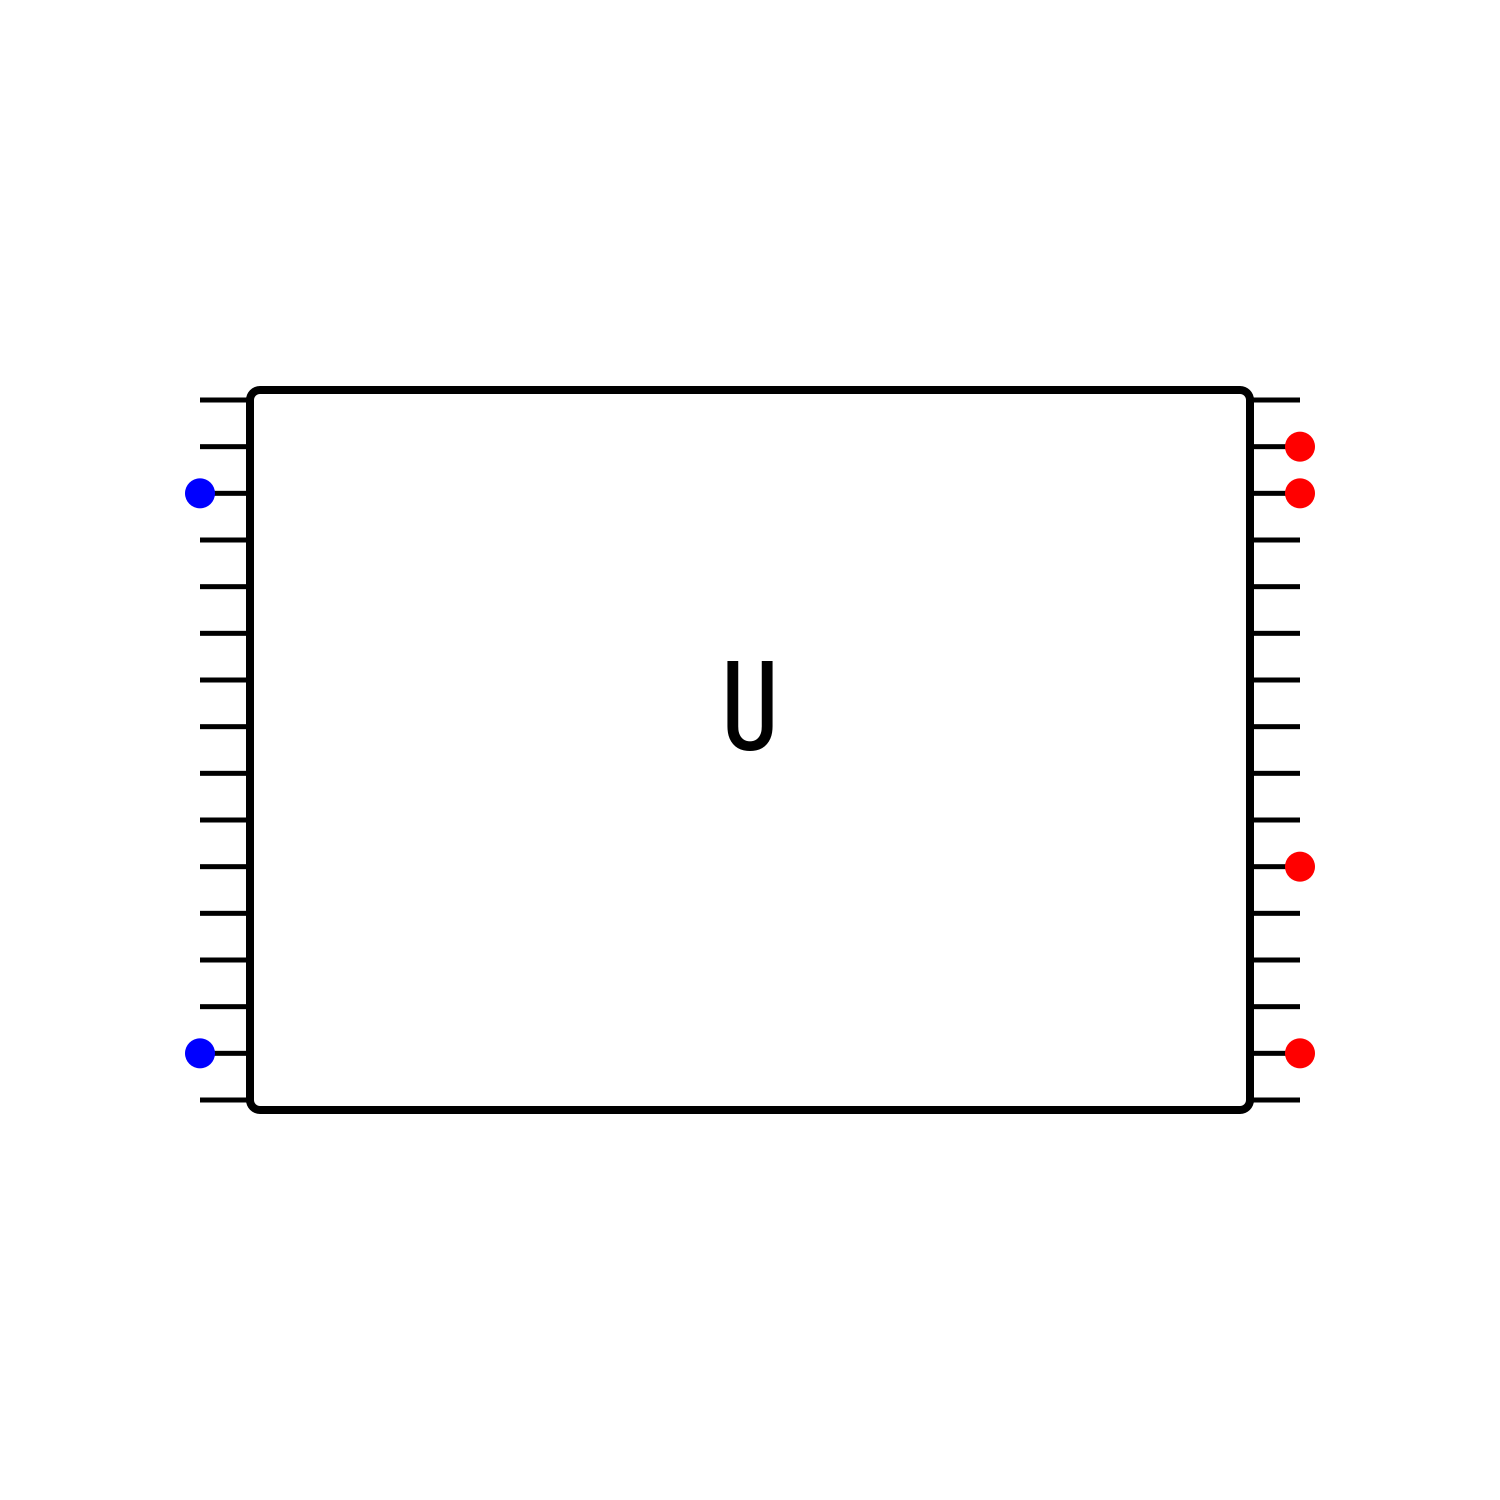

In [7]:
visualize_sampling(my_input, res)